迴歸分析
請將 random.seed(xxx)改為學號後兩碼

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_dots = 100
np.random.seed(1)
X = np.linspace(0, 1, n_dots)                   
y = np.sqrt(X) + 0.2*np.random.rand(n_dots) - 0.1;

In [2]:
from sklearn import datasets

In [3]:
X_r=X.reshape(-1,1) # 將 Numpy 的陣列整形成符合 scikit-learn 輸入格式
y_r=y.reshape(-1,1)

使用 X_r及 y_r建構簡單迴歸模型，將程式碼至於下個cell中，並列出迴歸模型的係數 

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_r, y_r)
print('Slope: %.3f' % reg.coef_[0])
print('Intercept: %.3f' % reg.intercept_)


Slope: 0.838
Intercept: 0.243


繪製散佈圖及迴歸線

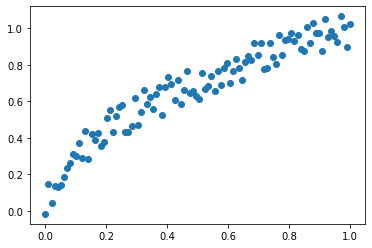

In [5]:
plt.scatter(X_r, y_r)


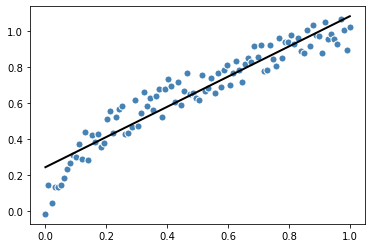

In [6]:
plt.scatter(X_r, y_r, c='steelblue', edgecolor='white', s=50)
plt.plot(X_r, reg.predict(X_r), color='black', lw=2)    
plt.show()

In [7]:
#使用 隨機梯度下降法進行迴歸係數的推估

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=3000, tol=1e-3, penalty=None, eta0=0.1, random_state=1)
sgd_reg.fit(X_r, y_r)
print('Intercept: %.3f' % sgd_reg.intercept_)
print('Slope: %.3f' % sgd_reg.coef_[0])

Intercept: 0.306
Slope: 0.716


F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


計算兩種迴歸演算法之判定係數 r2, 均方差與準確性

In [24]:
#計算判定係數 r2 及均方差
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_r_pred = reg.predict(X_r)
train_score = reg.score(X_r, y_r)

print('train_score:' ,train_score)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_r,y_r_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_r, y_r_pred)))

train_score: 0.9024952673223234


TypeError: not enough arguments for format string

將資料區分成訓練集與測試集，分別以2階、3階、4階及5階建構多項式迴歸模型

繪製四個多項式迴歸模型之散佈圖及迴歸線

比較1階2階、3階、4階及5階迴歸模型之訓練集與測試集的平均誤差